In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder

In [126]:
data = pd.read_csv('/content/claims_dummy_data.csv')

In [127]:
data.head()

,Claim ID,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Previous_Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,167647,Male,22,1,7,1,< 1 Year,No,2630,152,0
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327,26,0
2,32023,Female,66,1,33,0,1-2 Year,Yes,35841,124,0
3,87447,Female,22,1,33,0,< 1 Year,No,27645,152,0
4,501933,Male,28,1,46,1,< 1 Year,No,29023,152,0


In [128]:
data.describe()

,Claim ID,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,1.000000


In [129]:
data.isnull().sum()

,0
Claim ID,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Previous_Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [130]:
# unique values in each columns
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")

Claim ID: 382154
Gender: 2
Age: 66
Driving_License: 2
Region_Code: 53
Previously_Insured: 2
Vehicle_Age: 3
Previous_Vehicle_Damage: 2
Annual_Premium: 48993
Policy_Sales_Channel: 156
Response: 2


In [131]:
# max values in each columns int columns
for col in data.select_dtypes(include=['int']).columns:
    print(f"{col}: {data[col].max()}")

Claim ID: 508145
Age: 85
Driving_License: 1
Region_Code: 52
Previously_Insured: 1
Annual_Premium: 540165
Policy_Sales_Channel: 163
Response: 1


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Claim ID                 382154 non-null  int64 
 1   Gender                   382154 non-null  object
 2   Age                      382154 non-null  int64 
 3   Driving_License          382154 non-null  int64 
 4   Region_Code              382154 non-null  int64 
 5   Previously_Insured       382154 non-null  int64 
 6   Vehicle_Age              382154 non-null  object
 7   Previous_Vehicle_Damage  382154 non-null  object
 8   Annual_Premium           382154 non-null  int64 
 9   Policy_Sales_Channel     382154 non-null  int64 
 10  Response                 382154 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.1+ MB


In [133]:
print(data.select_dtypes(include=['object']).columns)
data.select_dtypes(include=['object']).head()

Index(['Gender', 'Vehicle_Age', 'Previous_Vehicle_Damage'], dtype='object')


,Gender,Vehicle_Age,Previous_Vehicle_Damage
0,Male,< 1 Year,No
1,Male,1-2 Year,Yes
2,Female,1-2 Year,Yes
3,Female,< 1 Year,No
4,Male,< 1 Year,No


In [134]:
data.Gender.unique(),data.Vehicle_Age.unique(),data.Previous_Vehicle_Damage.unique()

(array(['Male', 'Female'], dtype=object),
 array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object),
 array(['No', 'Yes'], dtype=object))

In [135]:
def label_encode_column(df, column_name):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the specified column
    df[column_name] = label_encoder.fit_transform(df[column_name])

    return df[column_name]

# Fit and transform the categories to numeric labels
data['Vehicle_Age'] = label_encode_column(data, 'Vehicle_Age')
data['Previous_Vehicle_Damage'] = label_encode_column(data, 'Previous_Vehicle_Damage')
data['Gender'] = label_encode_column(data, 'Gender')
data[['Vehicle_Age','Previous_Vehicle_Damage','Gender']].head()

,Vehicle_Age,Previous_Vehicle_Damage,Gender
0,1,0,1
1,0,1,1
2,0,1,0
3,1,0,0
4,1,0,1


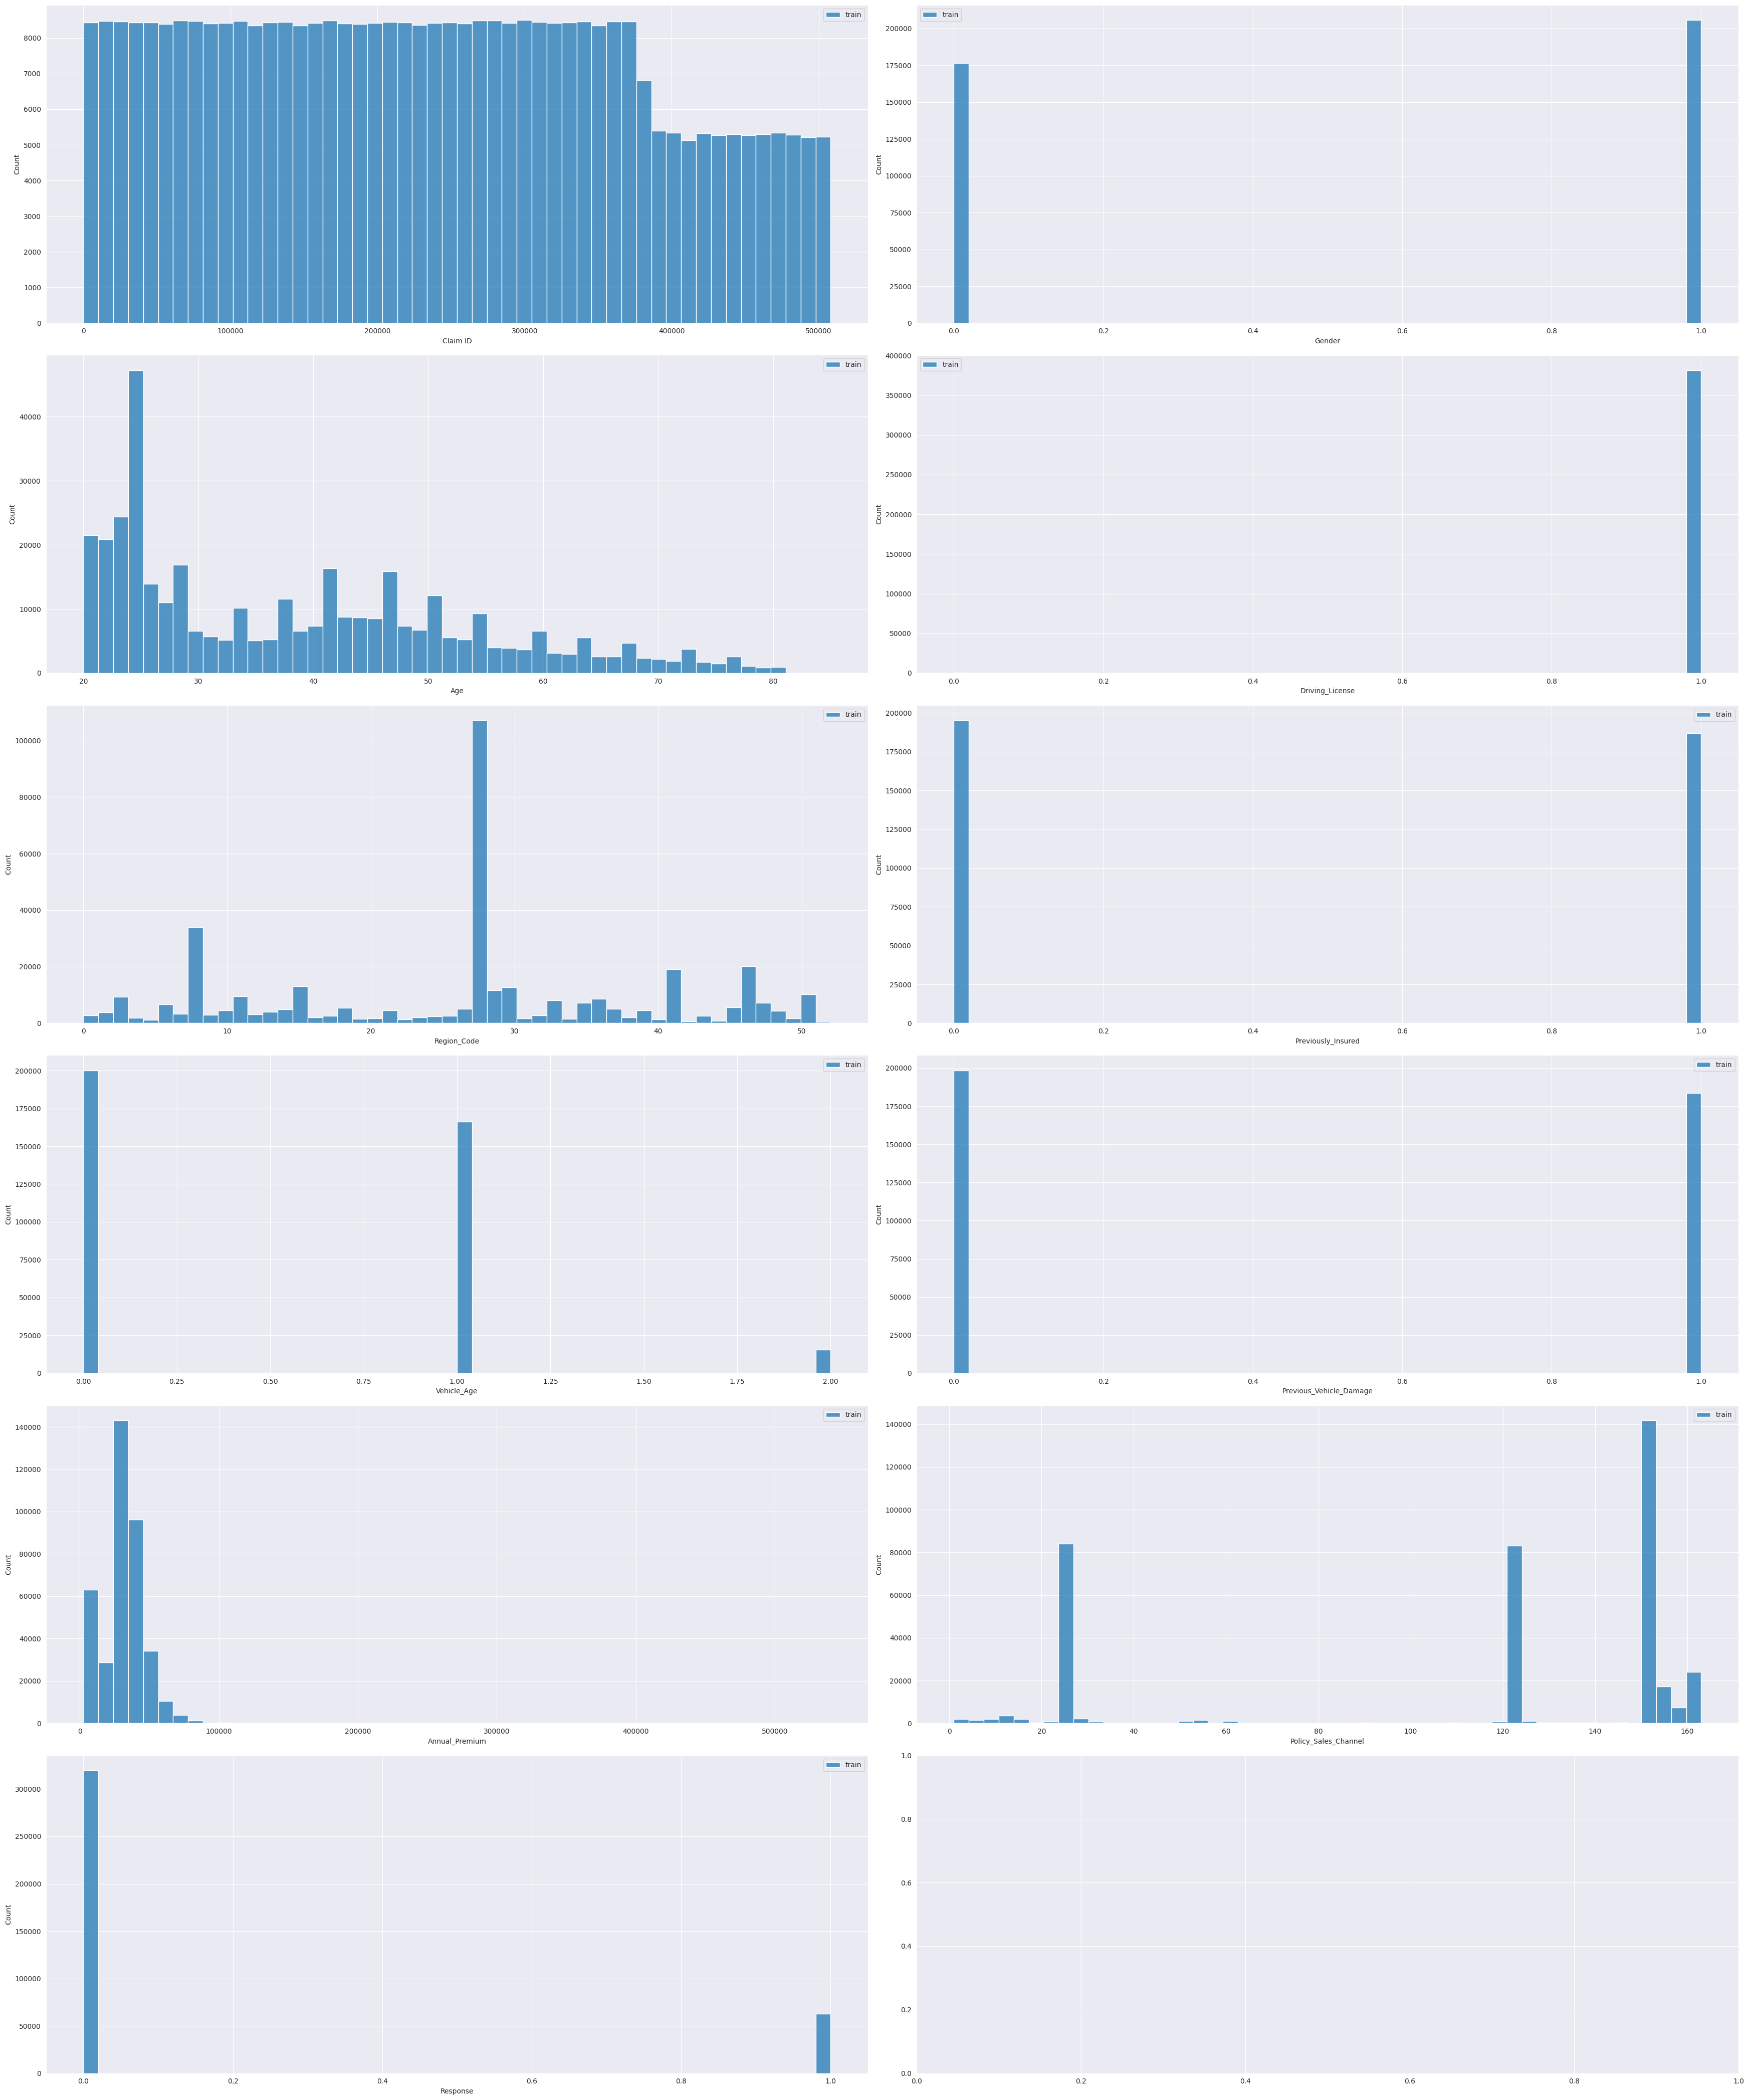

In [136]:
num_features = len(data.columns)
num_rows = (num_features // 2) + (num_features % 2)

fig, ax = plt.subplots(num_rows, 2, figsize=(35, num_rows * 7))

i = 0
for index, feature in enumerate(data.columns):
    row, col = divmod(i, 2)
    sn.histplot(data[feature], bins=50, label='train', ax=ax[row, col])
    ax[row, col].set_xlabel(feature)
    ax[row, col].legend()
    i += 1

plt.tight_layout()

plt.show()

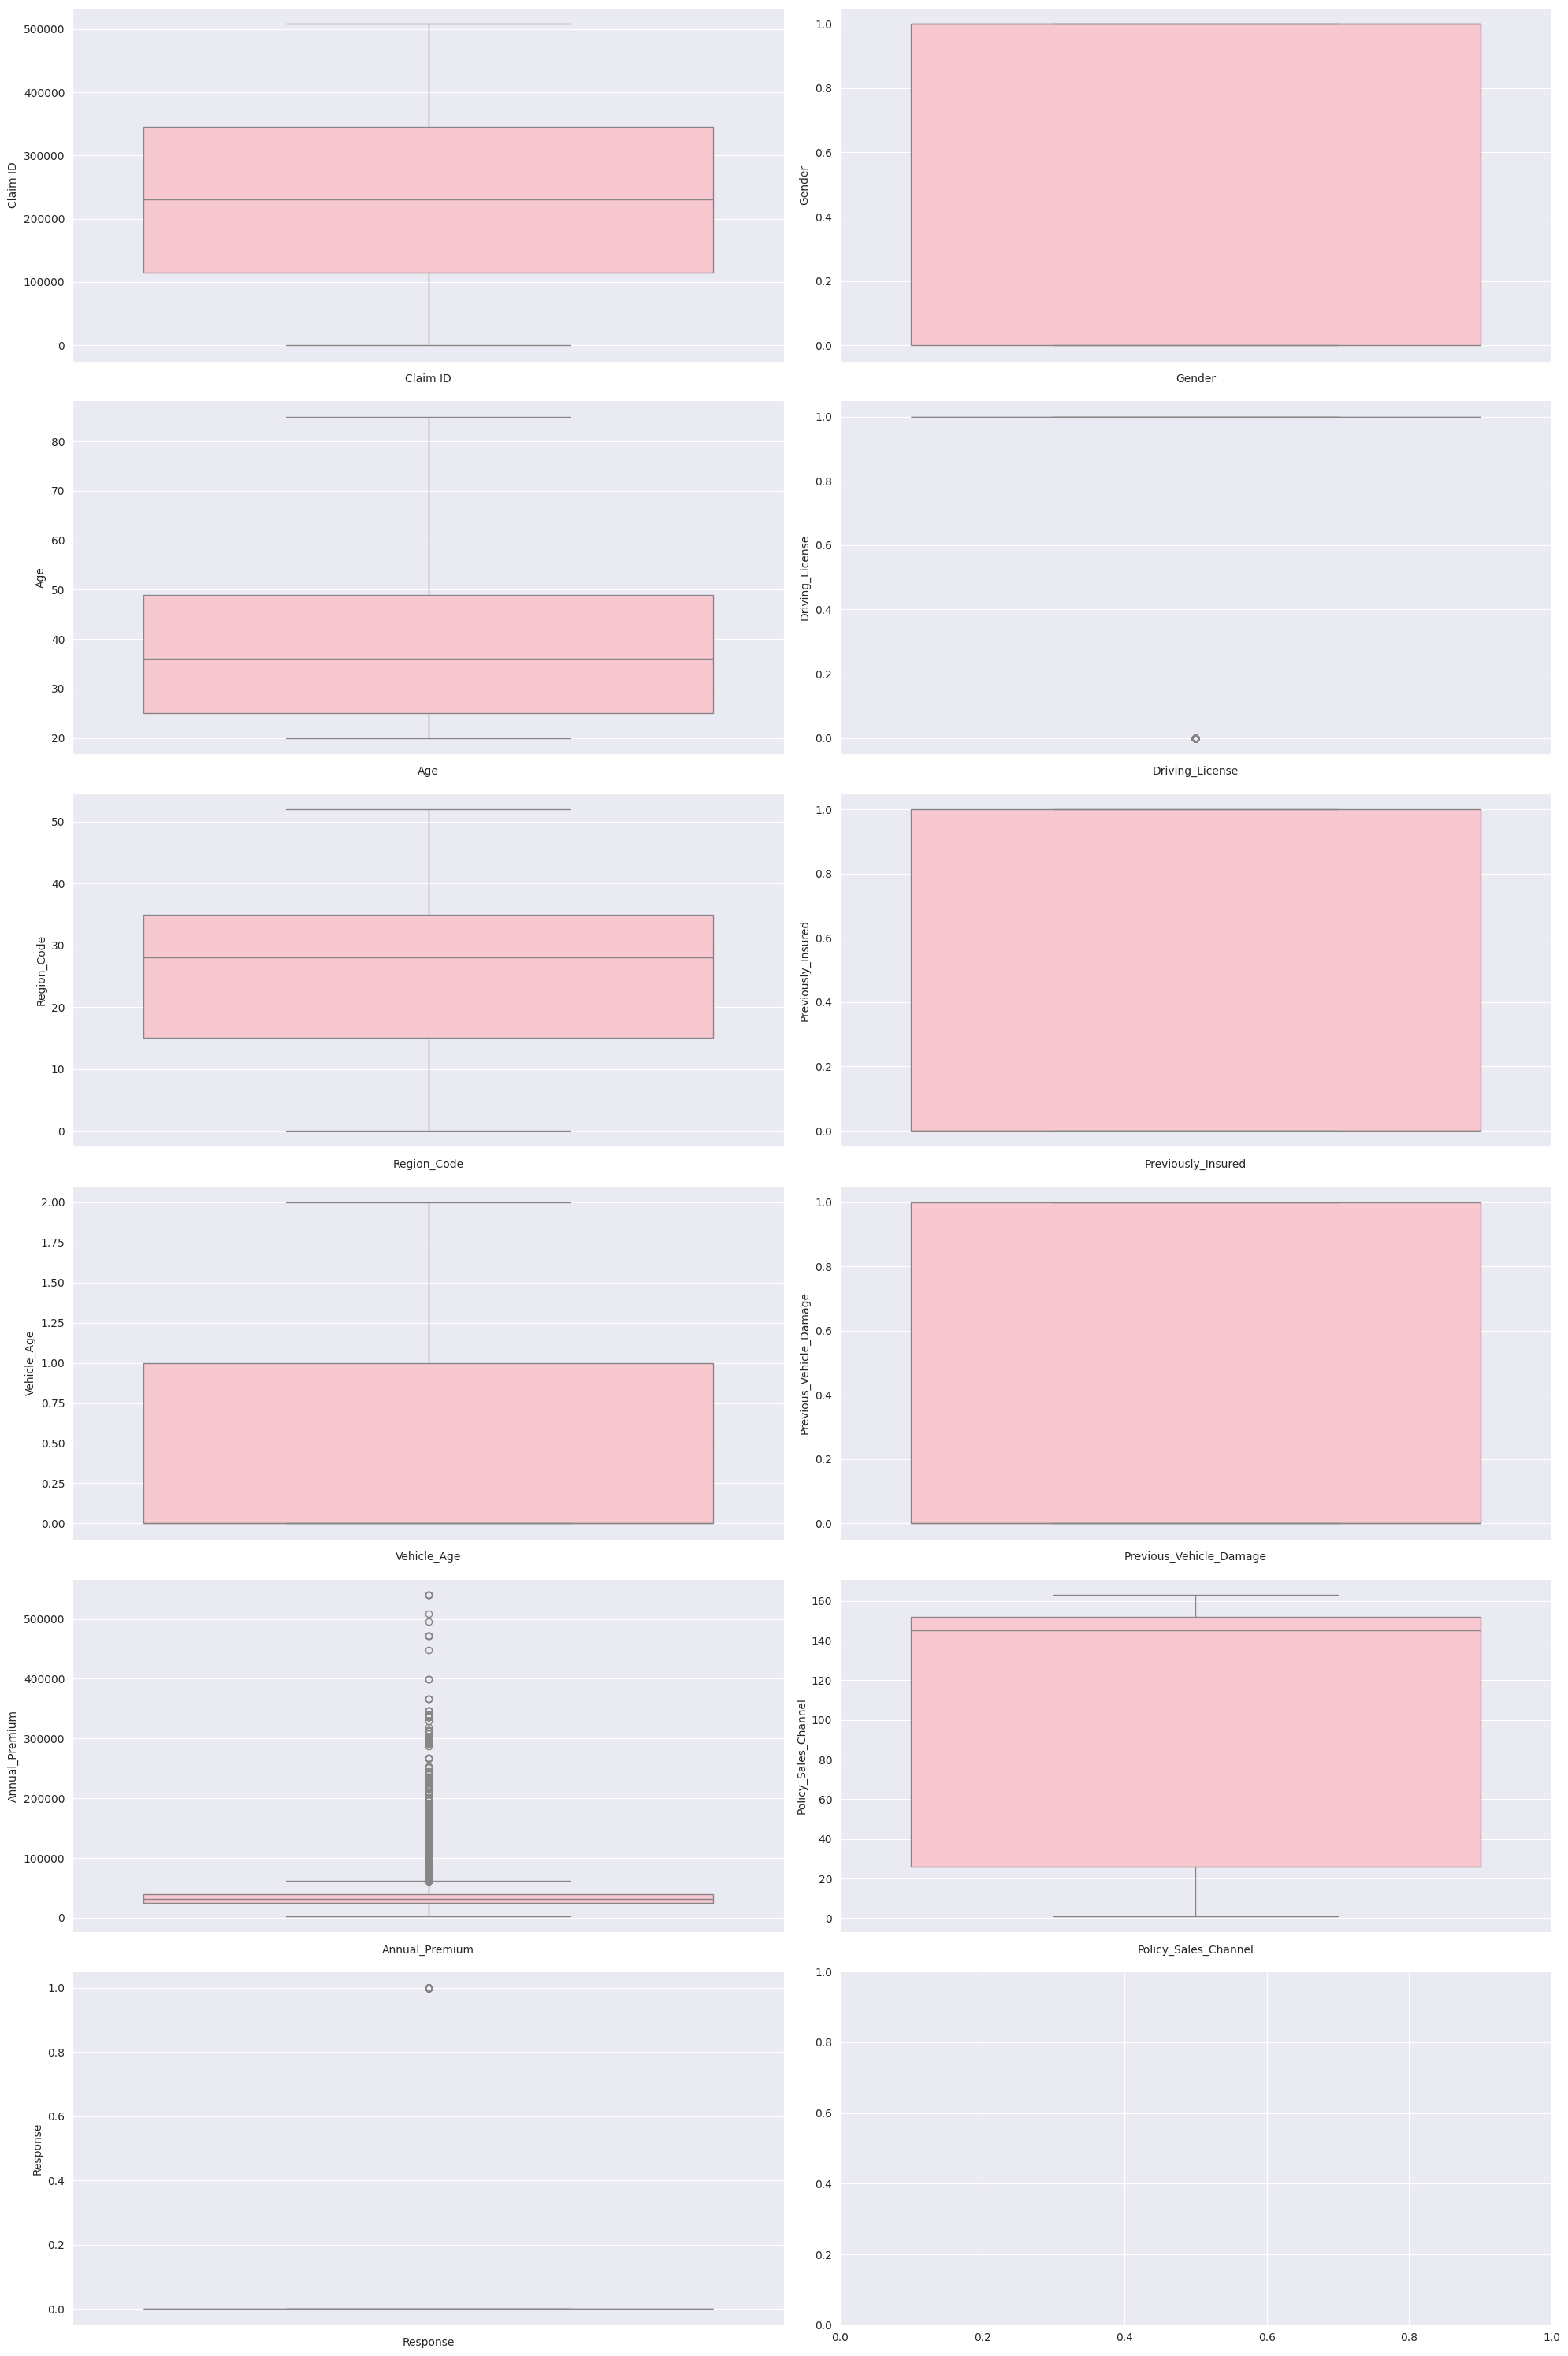

In [137]:

fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

i = 0
for index, feature in enumerate(data.columns):
    row, col = divmod(i, 2)
    sn.boxplot(data[feature], color="pink", ax=ax[row, col])

    ax[row, col].set_xlabel(feature)
    i += 1

plt.tight_layout()

plt.show()

Text(0, 0.5, 'Count')

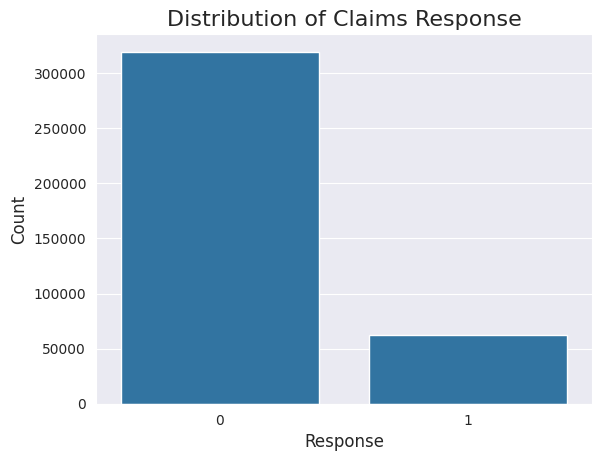

In [138]:
sns_countplot = sn.countplot(x='Response', data=data)
sns_countplot.set_title('Distribution of Claims Response', fontsize=16)

sns_countplot.set_xlabel('Response', fontsize=12)
sns_countplot.set_ylabel('Count', fontsize=12)

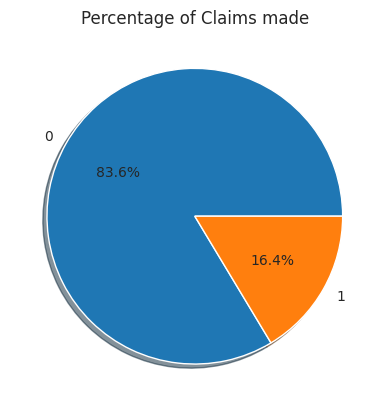

In [139]:
plt.title('Percentage of Claims made')
labels = data['Response'].astype('category').cat.categories.tolist()
counts = data['Response'].value_counts()
sizes = [counts[label] for label in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()


<Axes: >

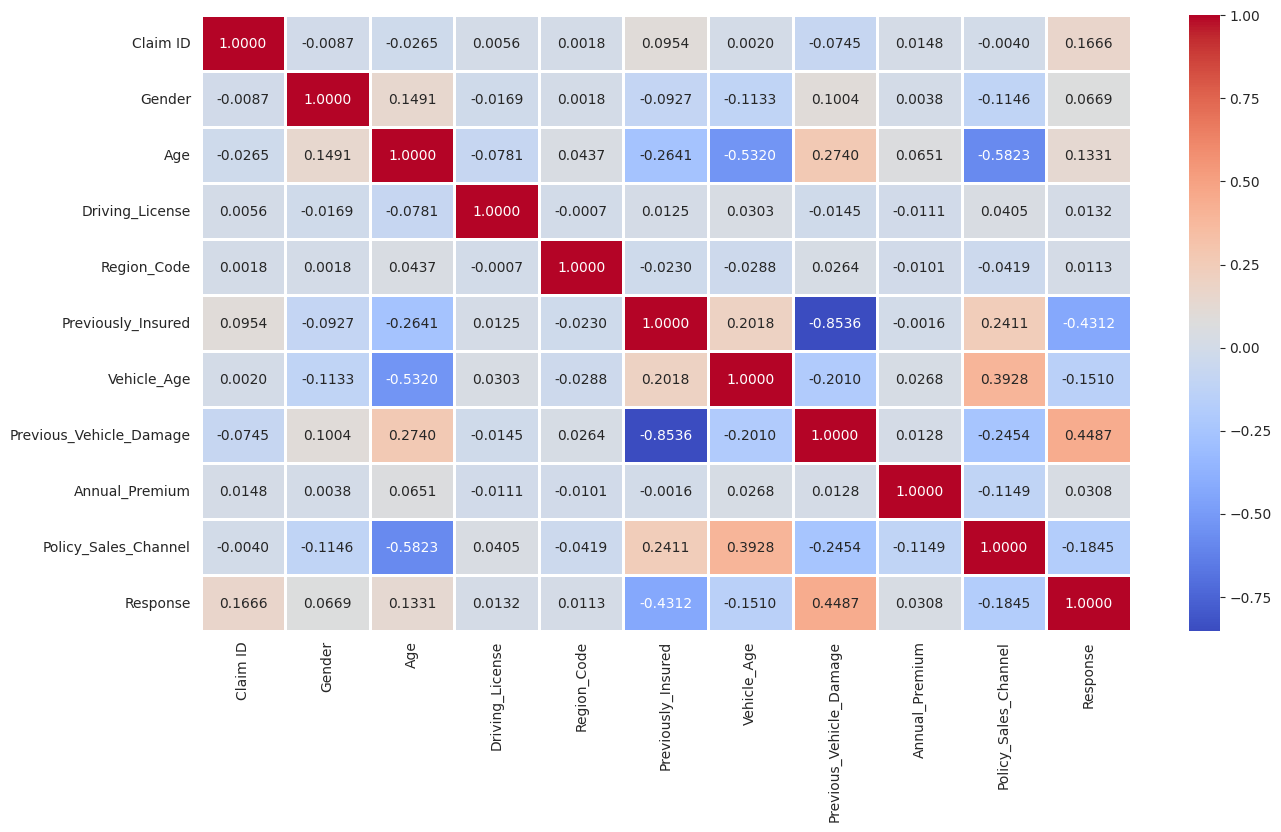

In [140]:
# Correlation between features
fig=plt.figure(figsize=(15,8))
sn.heatmap(data.corr(),annot = True,linewidths = .9,fmt = '.4f',cmap='coolwarm')


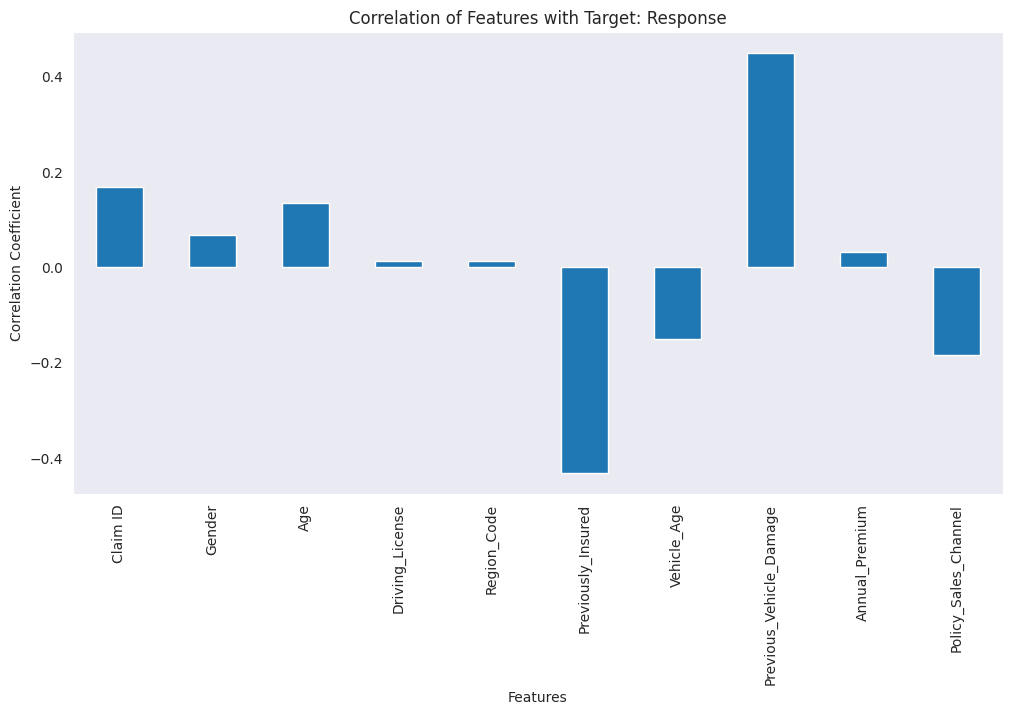

In [141]:
def plot_feature_correlation(df, target_column):
    corr_matrix = df.corr()


    target_corr = corr_matrix[target_column].drop(target_column)

    plt.figure(figsize=(12, 6))
    target_corr.plot(kind='bar')
    plt.title(f'Correlation of Features with Target: {target_column}')
    plt.ylabel('Correlation Coefficient')
    plt.xlabel('Features')
    plt.grid()
    plt.show()

plot_feature_correlation(data, 'Response')


In [142]:
#features to focus on :-
"""
Claim ID -  all unique values, do not add meaningful predictive power
Gender - categorical variable
Age
Driving_License - categorical variable
Region_Code
Previously_Insured - high -ve corr with target
Vehicle_Age - categorical variable
Previous_Vehicle_Damage
Annual_Premium -  contains outliers need to handle
Policy_Sales_Channel - high -ve corr with target
Response - target variable

"""
data = pd.read_csv('/content/claims_dummy_data.csv')

In [143]:
# Gender relation with claim

In [144]:
df_male = data[(data['Gender'] == 'Male') & (data['Response'] == 1)]
df_female = data[(data['Gender'] == 'Female') & (data['Response'] == 1)]
df_male.shape,df_female.shape

((38397, 11), (24204, 11))

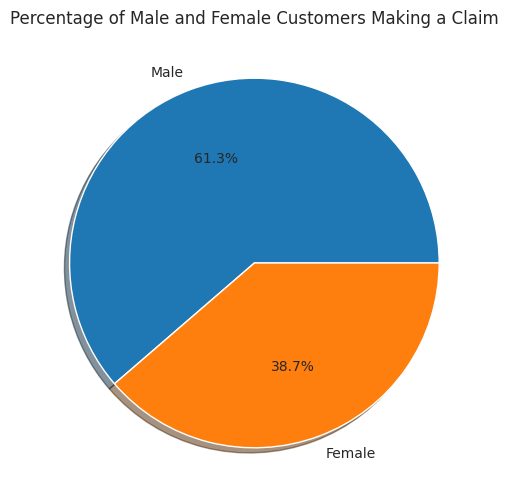

In [145]:
claim_counts = data[data['Response'] == 1]['Gender'].value_counts()

labels = ['Male', 'Female']
sizes = claim_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',  shadow=True)
plt.title('Percentage of Male and Female Customers Making a Claim')
plt.show()

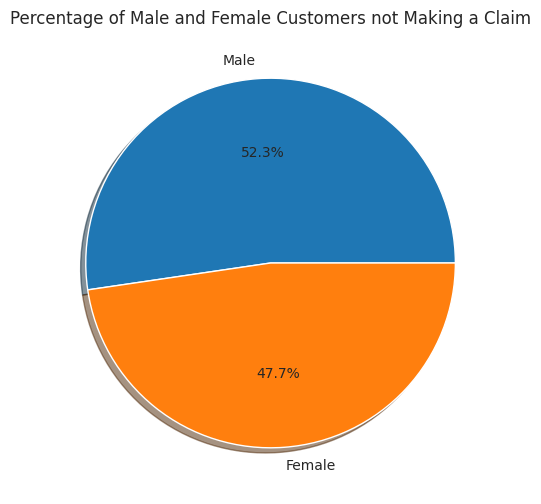

In [146]:
claim_counts = data[data['Response'] == 0]['Gender'].value_counts()

labels = ['Male', 'Female']
sizes = claim_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',  shadow=True)
plt.title('Percentage of Male and Female Customers not Making a Claim')
plt.show()

In [147]:
# more claims were mage by male
total_claims_by_age = pd.DataFrame(data.groupby('Age')['Response'].value_counts().unstack().fillna(0))
weighted_age_claims = total_claims_by_age[1] / (total_claims_by_age[1] + total_claims_by_age[0])
total_claims_by_age

Response,0,1
Age,,
20,5592.0,143.0
21,15291.0,479.0
22,20199.0,645.0
23,23676.0,748.0
24,25404.0,793.0
...,...,...
81,50.0,2.0
82,31.0,1.0
83,23.0,1.0


<ipython-input-148-b63e46b5ea58>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claims_count = data[data['Response'] == 1].groupby('Age_Bins').size()
<ipython-input-148-b63e46b5ea58>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_claims_count = data[data['Response'] == 0].groupby('Age_Bins').size()


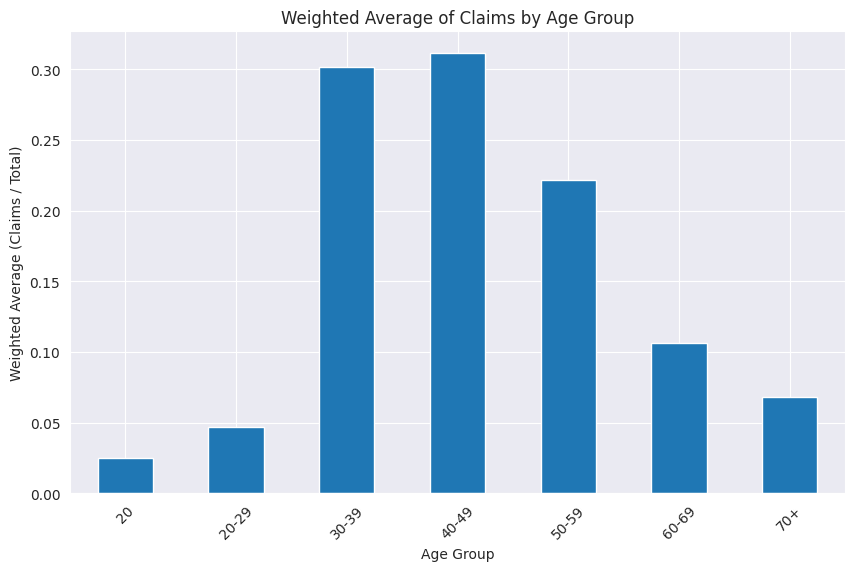

In [148]:
# Create age bins as per your requirement

age_bins = [0, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
data['Age_Bins'] = pd.cut(data['Age'], bins=age_bins , labels=age_labels)


claims_count = data[data['Response'] == 1].groupby('Age_Bins').size()
non_claims_count = data[data['Response'] == 0].groupby('Age_Bins').size()

weighted_avg = claims_count / (claims_count + non_claims_count)

plt.figure(figsize=(10, 6))
weighted_avg.plot(kind='bar')
plt.title('Weighted Average of Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Weighted Average (Claims / Total)')
plt.xticks(rotation=45)

plt.show()



<ipython-input-149-fd0a46c470de>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_claims = data[data['Response'] == 1].groupby(['Gender', 'Age_Bins']).size().unstack()


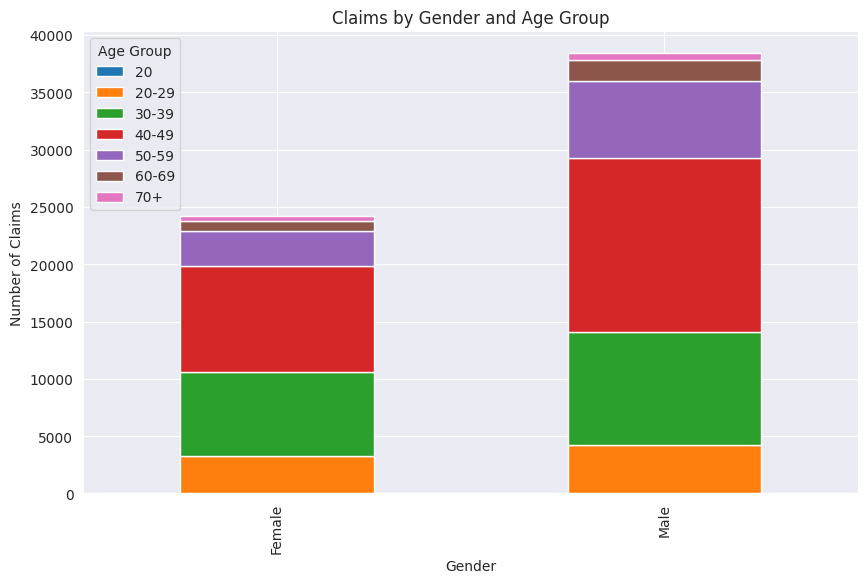

In [149]:

# Count of claims by gender and age bins
age_gender_claims = data[data['Response'] == 1].groupby(['Gender', 'Age_Bins']).size().unstack()

age_gender_claims.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Claims by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Number of Claims')
plt.legend(title='Age Group')
plt.show()




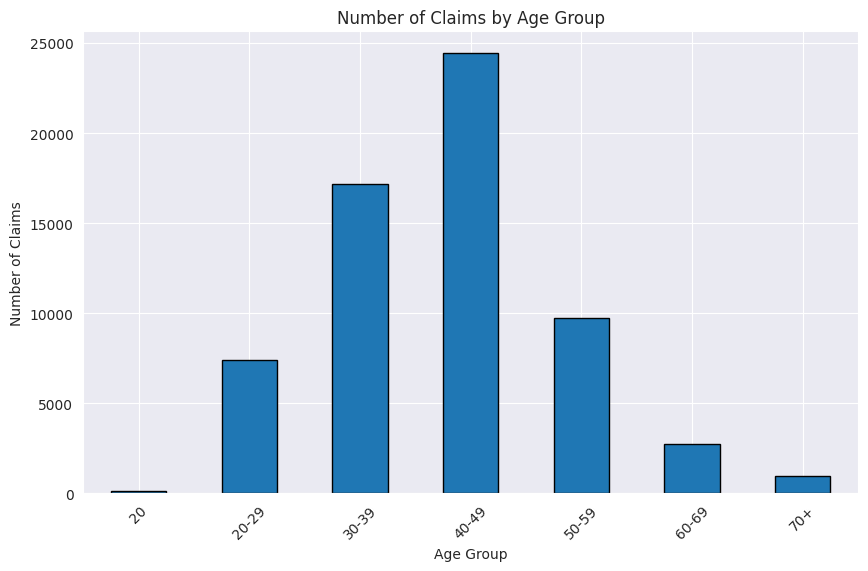

In [150]:
age_group_claims = data[data['Response'] == 1]['Age_Bins'].value_counts().sort_index()
age_group_nonclaims = data[data['Response'] == 0]['Age_Bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_group_claims.plot(kind='bar', edgecolor='black')
plt.title('Number of Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.show()

In [151]:
df_nolicenseclaim = data[(data['Driving_License'] == 0) & (data['Response'] == 1)]
df_licenseclaim = data[(data['Driving_License'] == 1) & (data['Response'] == 1)]

In [152]:
df_nolicenseclaim.shape,df_licenseclaim.shape

((37, 12), (62564, 12))

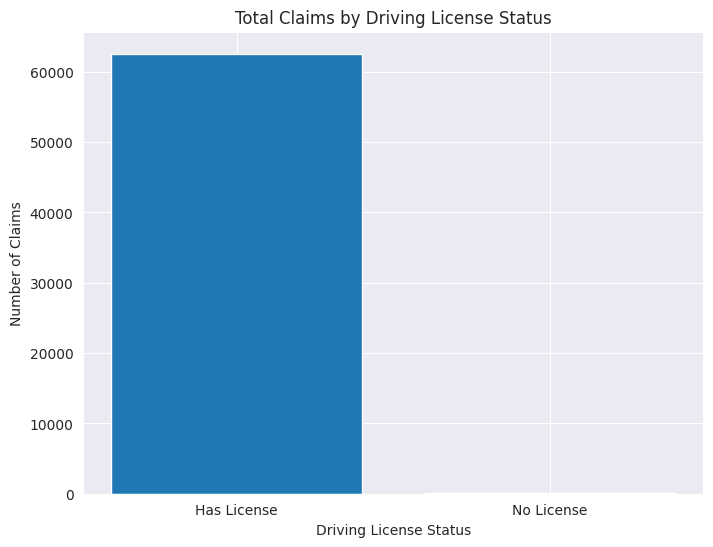

In [153]:
# Calculate the count of claims for customers with and without a driving license
license_claim_counts = data[data['Response'] == 1]['Driving_License'].value_counts()

labels = ['Has License', 'No License']
sizes = [license_claim_counts.get(1, 0), license_claim_counts.get(0, 0)]


plt.figure(figsize=(8, 6))
plt.bar(labels, sizes)
plt.title('Total Claims by Driving License Status')
plt.xlabel('Driving License Status')
plt.ylabel('Number of Claims')
plt.show()



In [154]:
total_claims_by_region = pd.DataFrame(data.groupby('Region_Code')['Response'].value_counts().unstack())
weighted_avg_claims = total_claims_by_region[1] / (total_claims_by_region[1] + total_claims_by_region[0])
total_claims_by_region.head()

Response,0,1
Region_Code,,
0,1694,145
1,840,100
2,3376,347
3,7670,1606
4,1445,380


In [155]:
#claims made by region
Regionclaim = data[data['Response'] == 1]['Region_Code'].value_counts()
total = len(data[data['Response']==1])
percen_claim =[]
for i in Regionclaim:
  percen_claim.append(i/total*100)
Regionclaim = pd.DataFrame(Regionclaim).reset_index()
Regionclaim['percentage'] = percen_claim
Regionclaim.head()

,Region_Code,count,percentage
0,28,28185,45.023242
1,8,4338,6.929602
2,41,3052,4.875321
3,46,2706,4.322615
4,29,1993,3.183655


In [156]:
Regionnonclaim = data[data['Response'] == 0]['Region_Code'].value_counts()
total = len(data[data['Response']==0])
percen_claim =[]
for i in Regionnonclaim:
  percen_claim.append(i/total*100)
Regionnonclaim = pd.DataFrame(Regionnonclaim).reset_index()
Regionnonclaim['percentage'] = percen_claim
Regionnonclaim.head()

,Region_Code,count,percentage
0,28,79014,24.726415
1,8,29603,9.263878
2,46,17497,5.475461
3,41,16038,5.018886
4,15,11891,3.721135


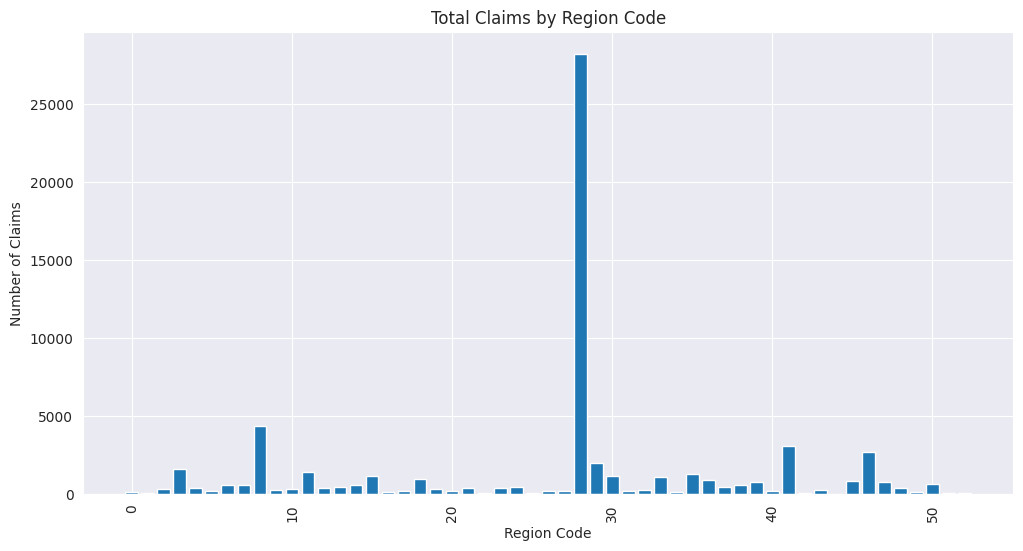

In [157]:
# Calculate the count of claims by region code
Regionclaim = data[data['Response'] == 1]['Region_Code'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.bar(Regionclaim.index, Regionclaim.values)
plt.title('Total Claims by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)
plt.show()


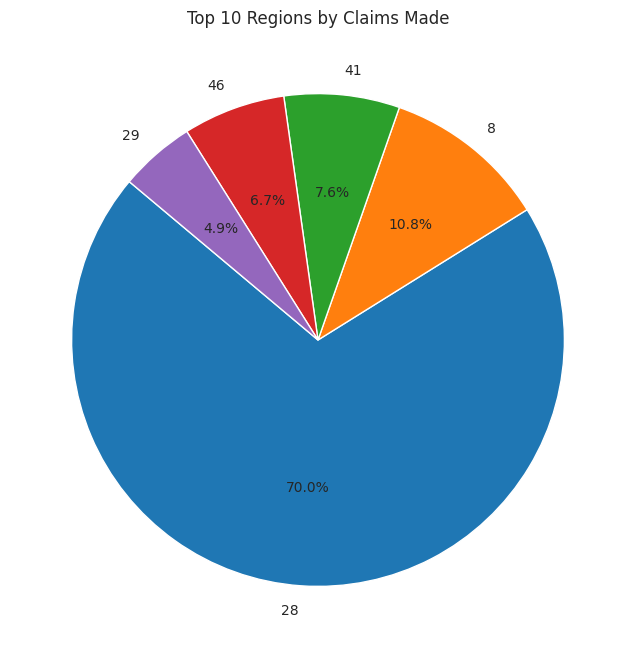

In [158]:
# Calculate the top 5 regions with the most claims
top_5_regions = Regionclaim.nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_regions.values, labels=top_5_regions.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Regions by Claims Made')
plt.show()


In [159]:
# Calculate the number of claims and non-claims for each region
region_claim_counts = data[data['Response'] == 1]['Region_Code'].value_counts()
region_non_claim_counts = data[data['Response'] == 0]['Region_Code'].value_counts()

region_claim_counts = region_claim_counts.reindex(data['Region_Code'].unique(), fill_value=0)
region_non_claim_counts = region_non_claim_counts.reindex(data['Region_Code'].unique(), fill_value=0)

region_weighted_avg = region_claim_counts / (region_claim_counts + region_non_claim_counts)

region_weighted_avg.head(10)


,count
Region_Code,
7,0.173264
28,0.262922
33,0.134366
46,0.133941
25,0.038851
8,0.127810
41,0.159874
39,0.169571
13,0.119851


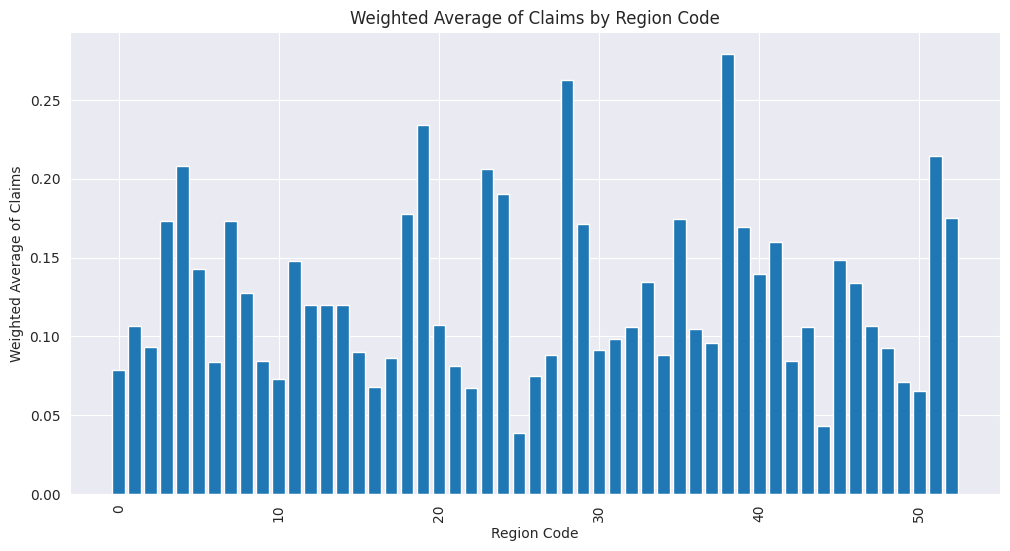

In [160]:

total_claims_by_region = data.groupby('Region_Code')['Response'].value_counts().unstack().fillna(0)

weighted_avg_claims = total_claims_by_region[1] / (total_claims_by_region[1] + total_claims_by_region[0])

plt.figure(figsize=(12, 6))
plt.bar(weighted_avg_claims.index, weighted_avg_claims.values)
plt.title('Weighted Average of Claims by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Weighted Average of Claims')
plt.xticks(rotation=90)
plt.show()


In [161]:
weighted_avg_claims.nlargest(5)

,0
Region_Code,
38,0.279047
28,0.262922
19,0.234216
51,0.214286
4,0.208219


In [162]:
df_Pre_Insured_claim = data[(data['Previously_Insured'] == 0) & (data['Response'] == 1)]
df_not_Pre_Insuredclaim = data[(data['Previously_Insured'] == 1) & (data['Response'] == 1)]

In [163]:
df_Pre_Insured_claim.shape,df_not_Pre_Insuredclaim.shape

((62466, 12), (135, 12))

In [164]:
data.groupby('Previously_Insured')['Response'].value_counts().unstack().fillna(0)

Response,0,1
Previously_Insured,,
0,132745,62466
1,186808,135


In [165]:
total_claims_by_vehicle_age = data.groupby('Vehicle_Age')['Response'].value_counts().unstack().fillna(0)
weighted_vehicle_age_claims = total_claims_by_vehicle_age[1] / (total_claims_by_vehicle_age[1] + total_claims_by_vehicle_age[0])

In [166]:
weighted_vehicle_age_claims

,0
Vehicle_Age,
1-2 Year,0.243746
< 1 Year,0.045349
> 2 Years,0.400960


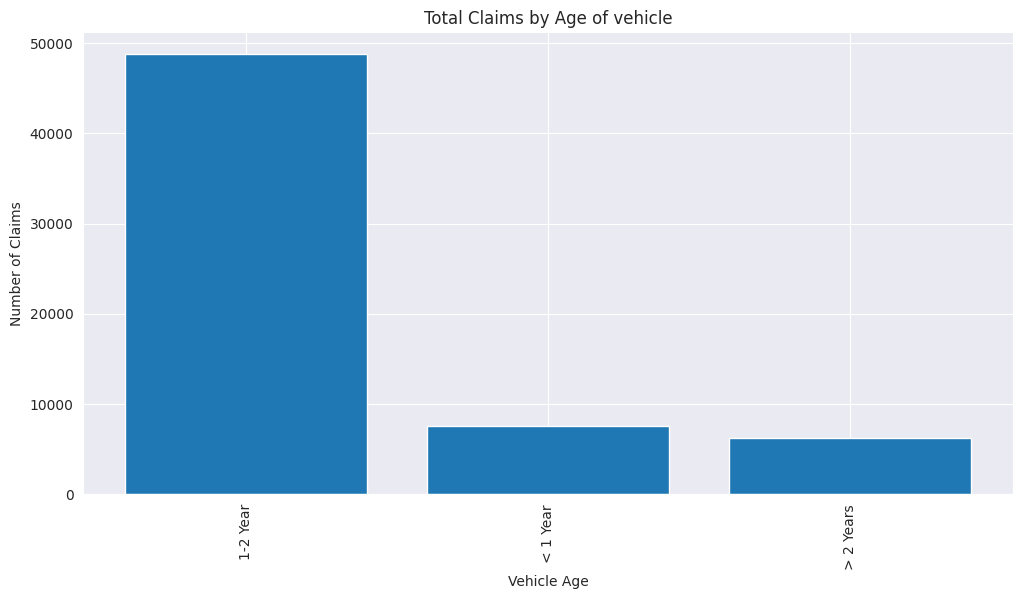

In [167]:
vehicleageclaim = data[data['Response'] == 1]['Vehicle_Age'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.bar(vehicleageclaim.index, vehicleageclaim.values)
plt.title('Total Claims by Age of vehicle')
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)
plt.show()

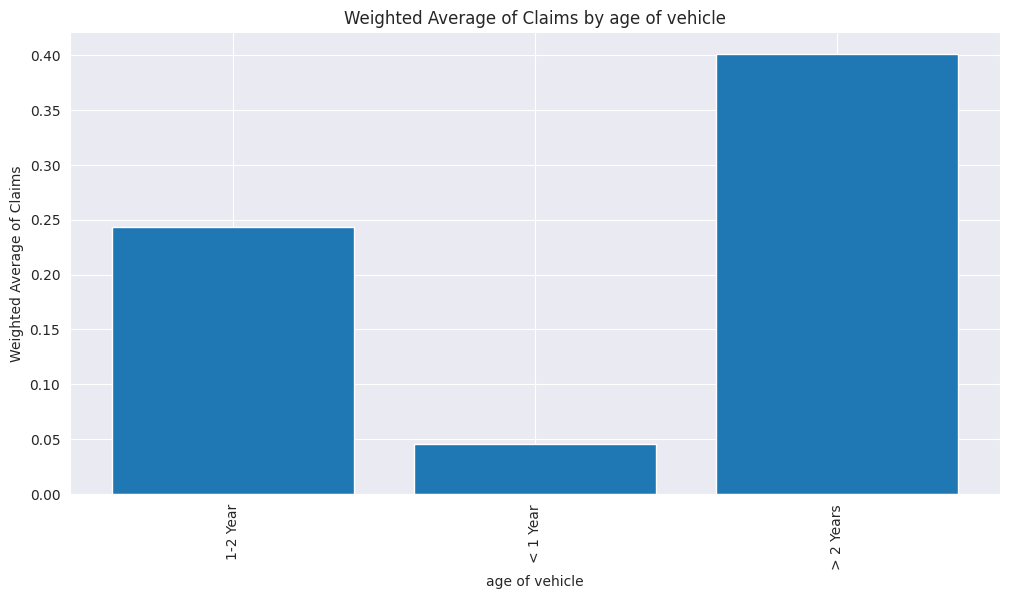

In [168]:
# Plotting the weighted average of claims by region
plt.figure(figsize=(12, 6))
plt.bar(weighted_vehicle_age_claims.index, weighted_vehicle_age_claims.values)
plt.title('Weighted Average of Claims by age of vehicle')
plt.xlabel('age of vehicle')
plt.ylabel('Weighted Average of Claims')
plt.xticks(rotation=90)
plt.show()

In [169]:
total_claims_by_vehicle_damage = data.groupby('Previous_Vehicle_Damage')['Response'].value_counts().unstack().fillna(0)

In [170]:
total_claims_by_vehicle_damage

Response,0,1
Previous_Vehicle_Damage,,
No,197689,812
Yes,121864,61789


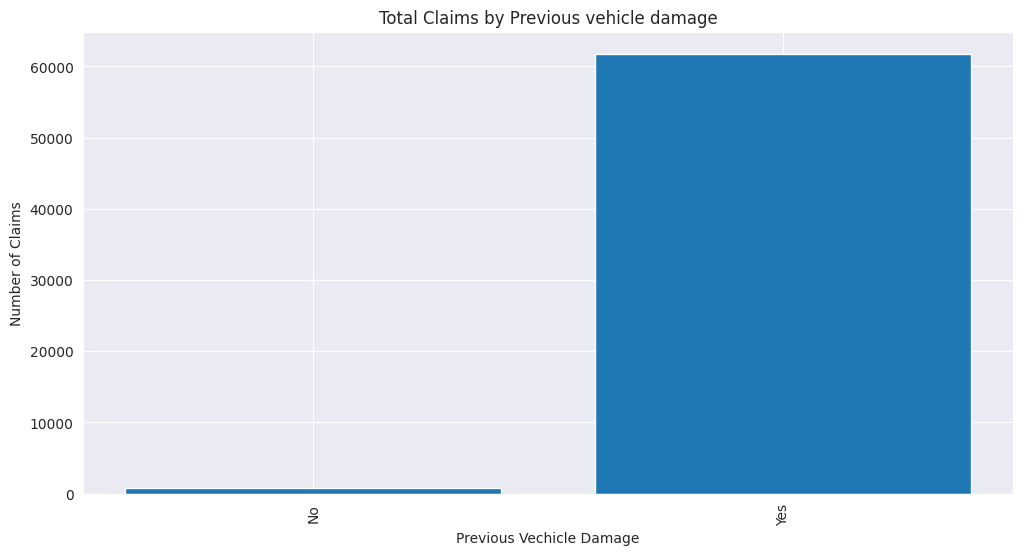

In [171]:
vehicleageclaim = data[data['Response'] == 1]['Previous_Vehicle_Damage'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
plt.bar(vehicleageclaim.index, vehicleageclaim.values)
plt.title('Total Claims by Previous vehicle damage')
plt.xlabel('Previous Vechicle Damage')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)
plt.show()

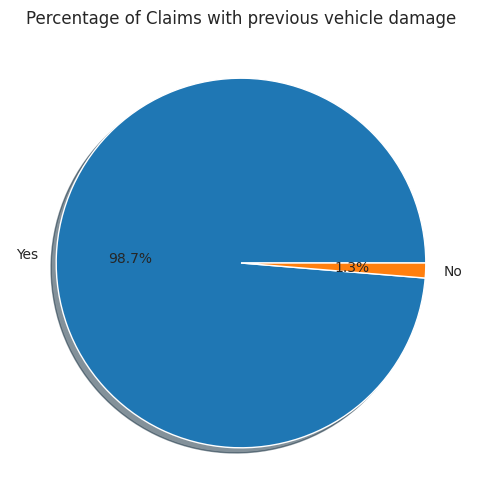

In [172]:
vehicldamageclaim  = data[data['Response'] == 1]['Previous_Vehicle_Damage'].value_counts()


labels = ['Yes', 'No']
sizes = vehicldamageclaim.values


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',  shadow=True)
plt.title('Percentage of Claims with previous vehicle damage')
plt.show()

In [173]:
data.groupby('Response')['Annual_Premium'].describe()

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,319553.0,30478.859059,16842.461636,2630.0,24428.0,31412.0,39024.0,540165.0
1,62601.0,31897.642961,18092.670043,2630.0,25323.0,33275.0,41477.0,540165.0


TypeError: 'value' must be an instance of str or bytes, not a float

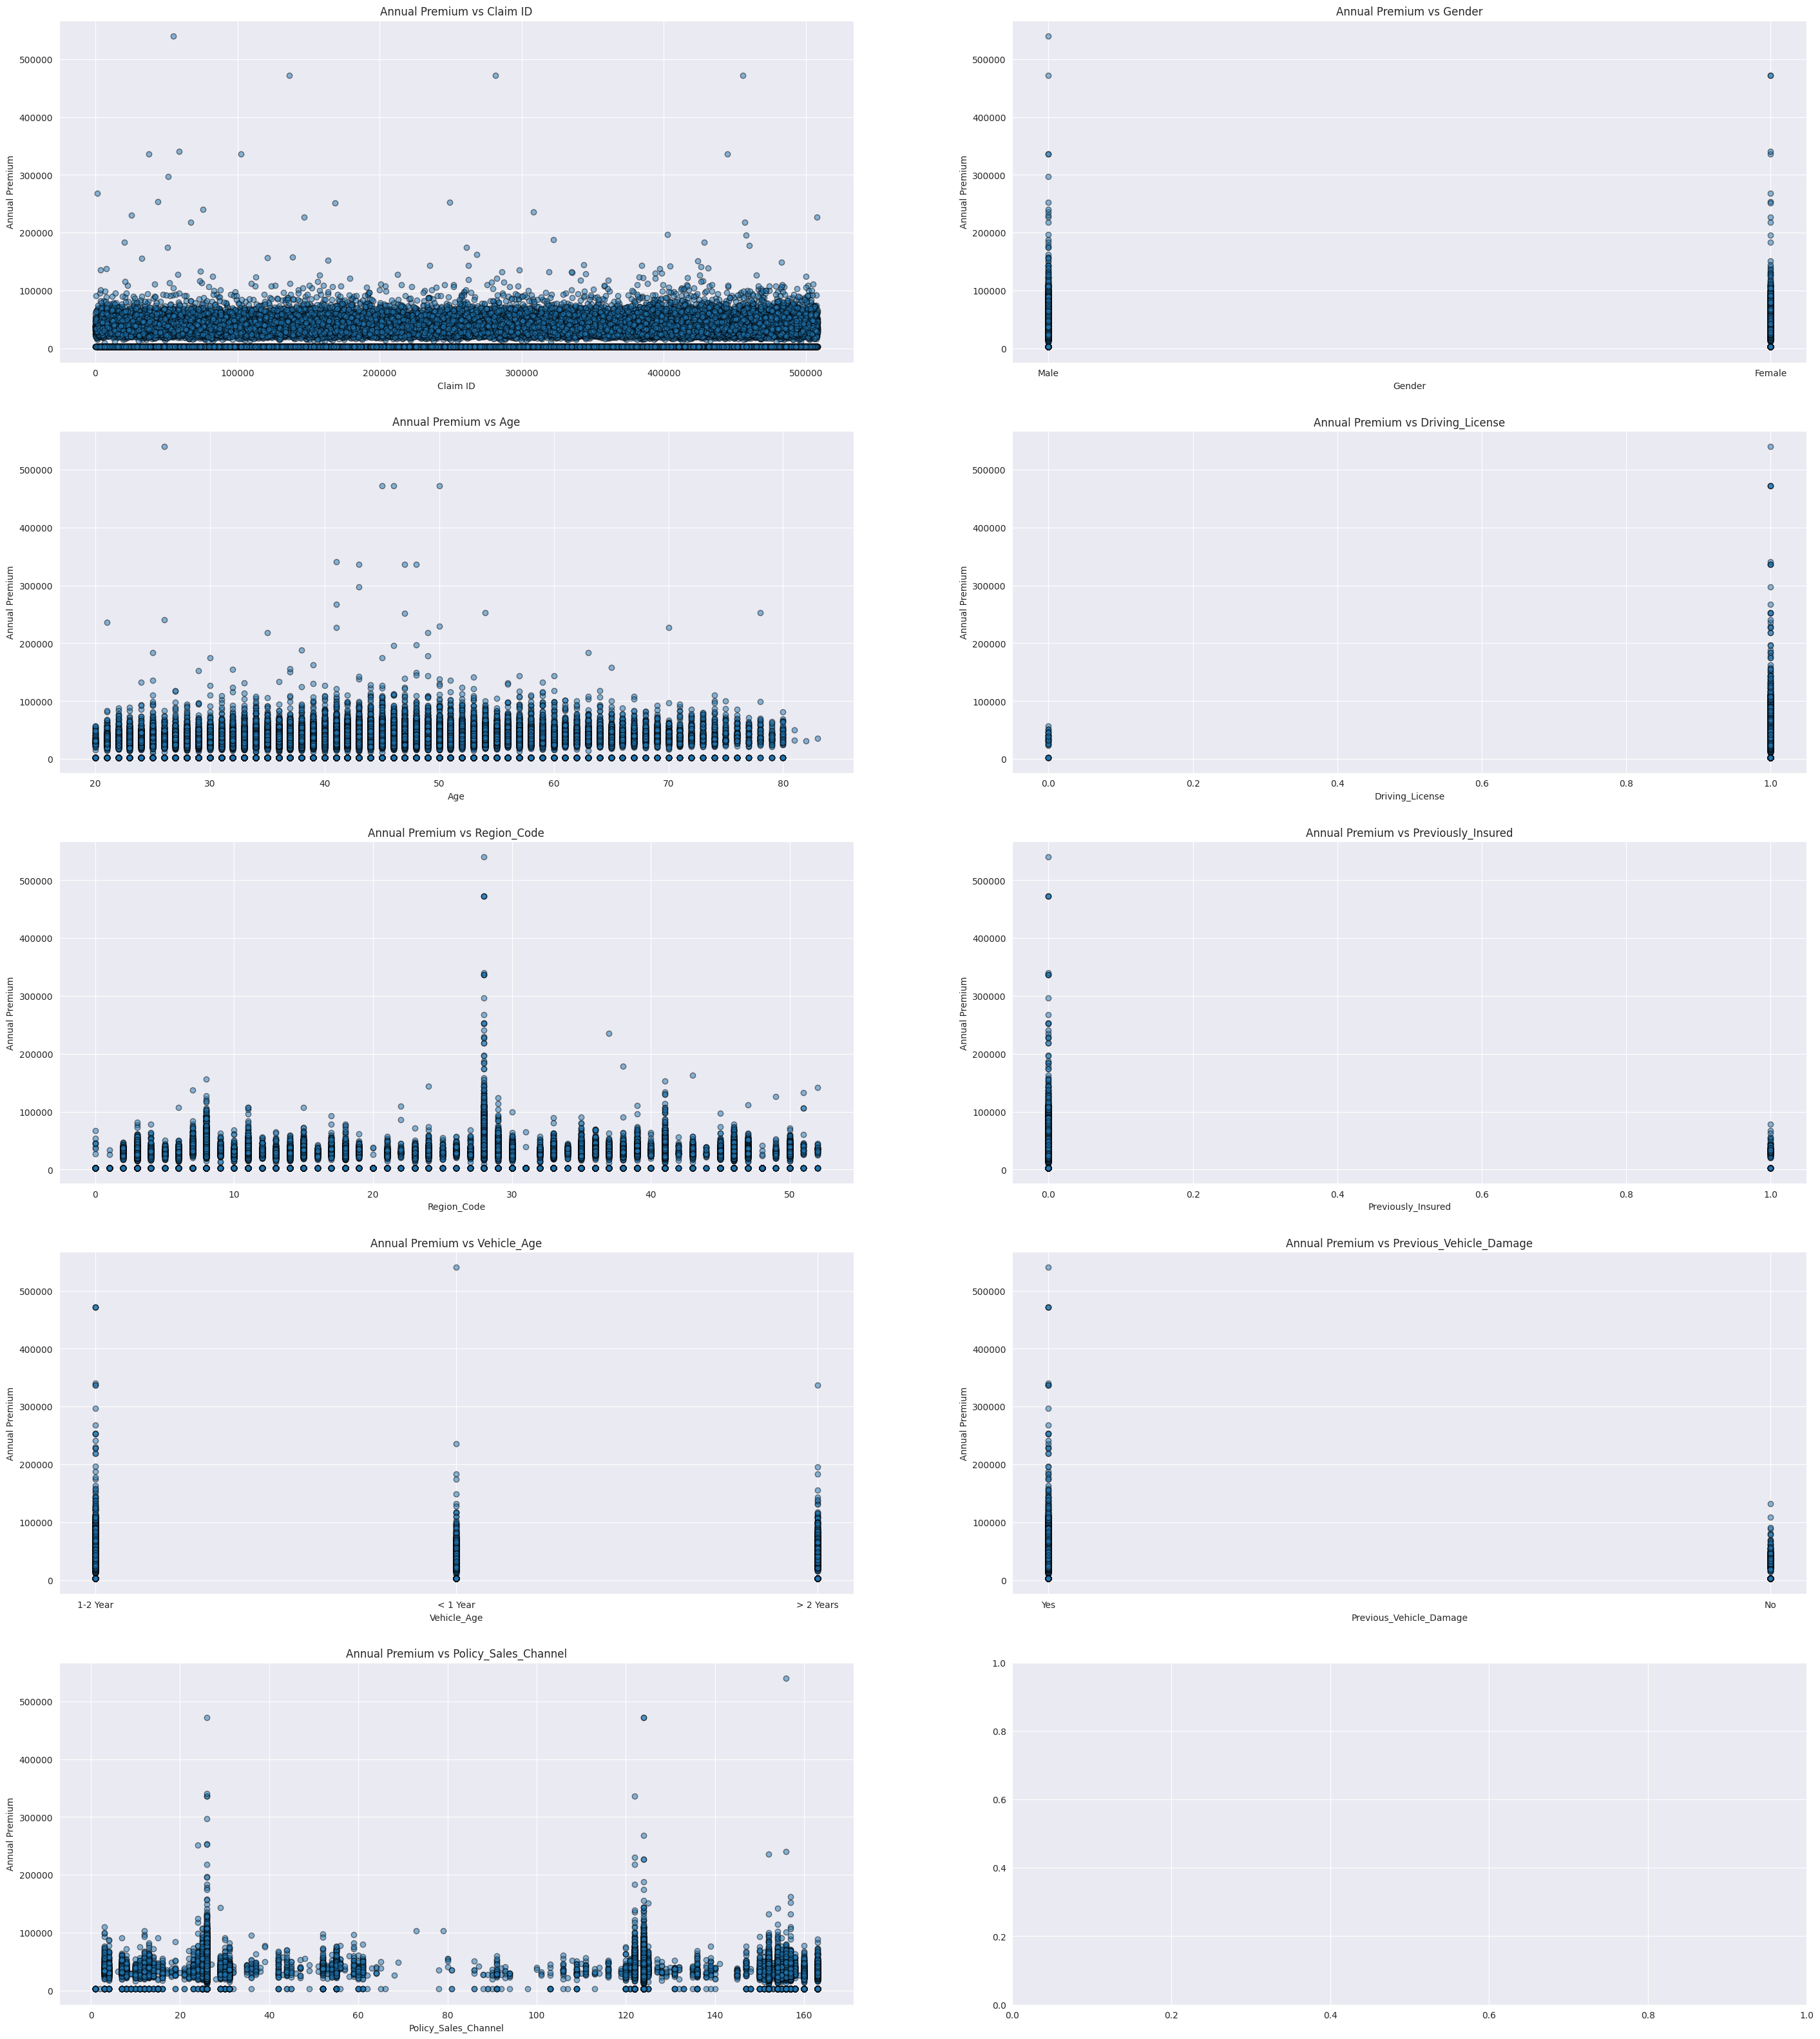

In [174]:
features_to_consider = data.drop(columns=['Annual_Premium','Response'])
data_claims = data[data['Response'] == 1]

fig, ax = plt.subplots(5, 2, figsize=(35, 40))
i = 1
for index, feature in enumerate(features_to_consider.columns):
    plt.subplot(5, 2, i)
    plt.scatter(data_claims[feature], data_claims['Annual_Premium'], alpha=0.5, edgecolors='black')
    plt.title(f'Annual Premium vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Annual Premium')
    i += 1
plt.tight_layout()
plt.show()


In [175]:
claims_by_channel = data['Policy_Sales_Channel'].value_counts()
claims_by_channel

,count
Policy_Sales_Channel,
152,137422
26,81566
124,73315
160,21045
156,10106
...,...
84,1
50,1
144,1


<ipython-input-178-d45203b76753>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_policy_counts = data.groupby(['Age_Group', 'Policy_Sales_Channel']).size().reset_index(name='Count')


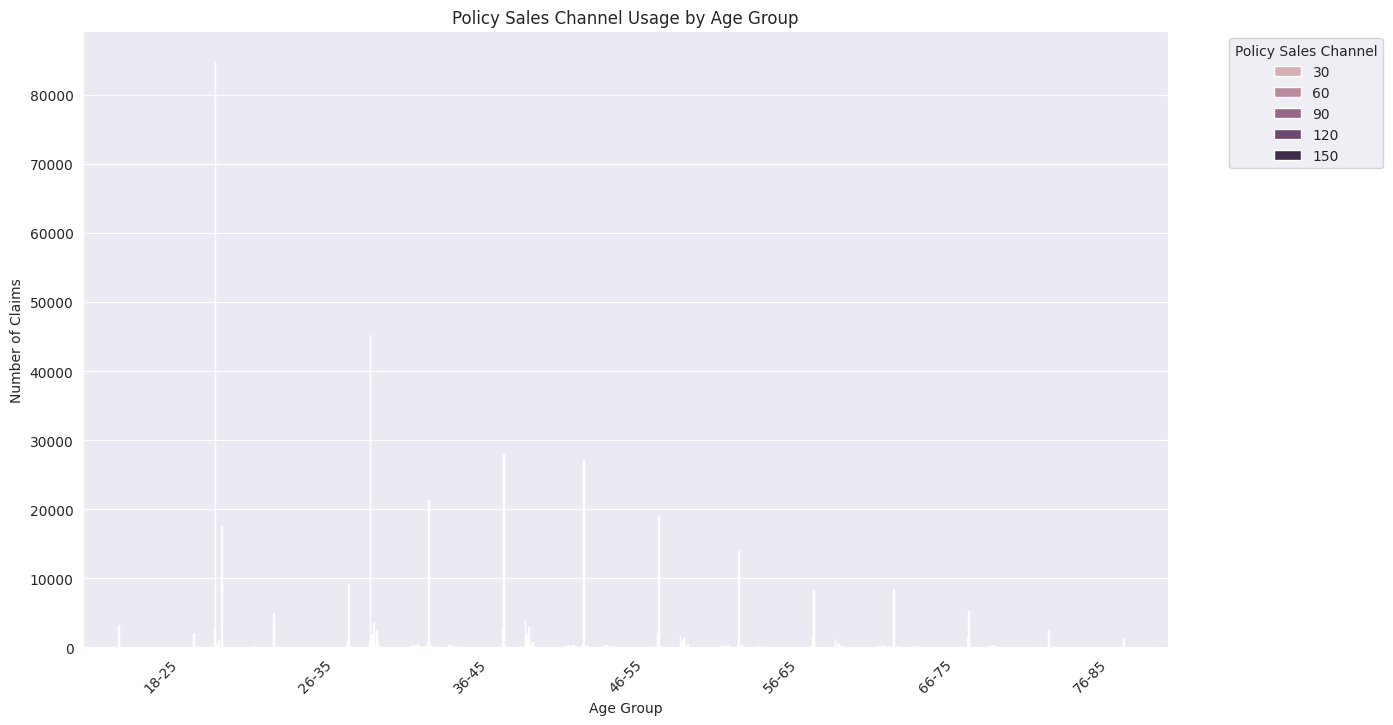

In [178]:

data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Aggregate the data by counting Policy_Sales_Channel within each Age_Group
age_policy_counts = data.groupby(['Age_Group', 'Policy_Sales_Channel']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(data=age_policy_counts, x='Age_Group', y='Count', hue='Policy_Sales_Channel', dodge=True)
plt.title("Policy Sales Channel Usage by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Claims")
plt.legend(title="Policy Sales Channel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


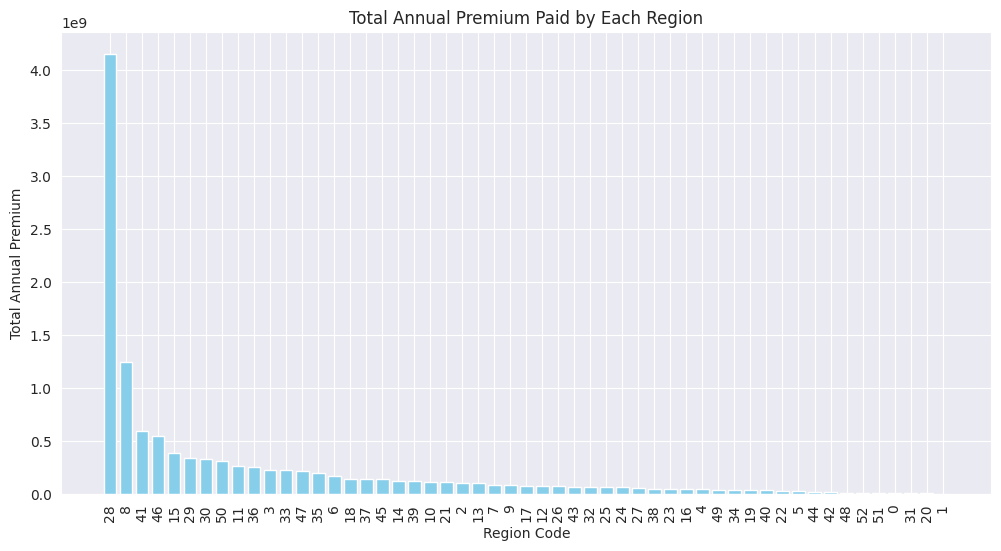

In [179]:

# Calculate the total annual premium paid by each region
region_premium = data.groupby('Region_Code')['Annual_Premium'].sum().reset_index()

# Sort by 'Annual_Premium' to find the highest-paying regions
region_premium = region_premium.sort_values(by='Annual_Premium', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(region_premium['Region_Code'].astype(str), region_premium['Annual_Premium'], color='skyblue')
plt.title("Total Annual Premium Paid by Each Region")
plt.xlabel("Region Code")
plt.ylabel("Total Annual Premium")
plt.xticks(rotation=90)
plt.show()


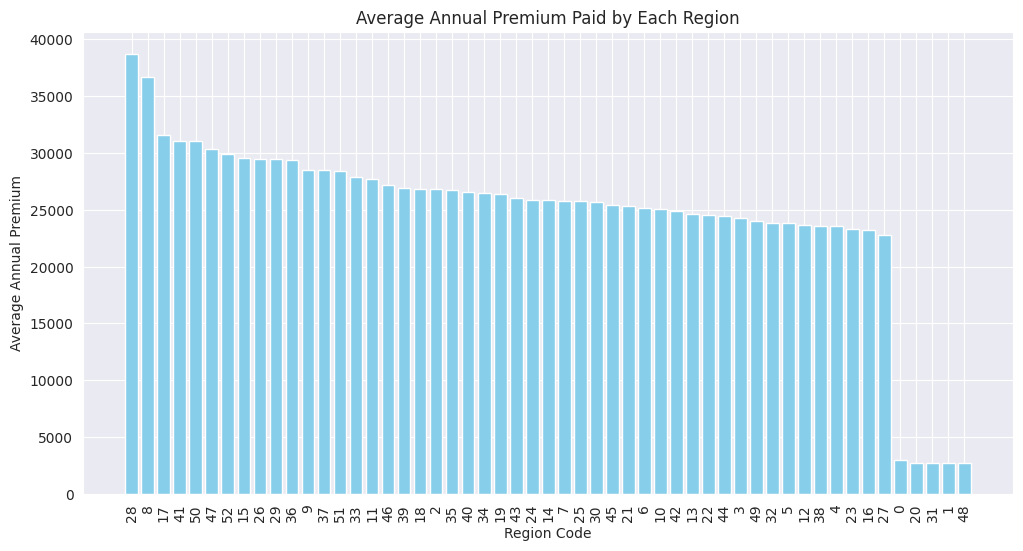

In [180]:

# Calculate the average annual premium paid by each region
region_avg_premium = data.groupby('Region_Code')['Annual_Premium'].mean().reset_index()


region_avg_premium = region_avg_premium.sort_values(by='Annual_Premium', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(region_avg_premium['Region_Code'].astype(str), region_avg_premium['Annual_Premium'], color='skyblue')
plt.title("Average Annual Premium Paid by Each Region")
plt.xlabel("Region Code")
plt.ylabel("Average Annual Premium")
plt.xticks(rotation=90)
plt.show()
